uncomment de volgende lijn om streamlit te installeren

In [ ]:
# pip install streamlit kaggle

Defaulting to user installation because normal site-packages is not writeable


In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as pe

In [67]:
import kaggle
import zipfile
import os

api = kaggle.api
datasets = api.datasets_list(search='Airplane Crashes and Fatalities')
ref = datasets[0]['ref']

kaggle.api.dataset_download_files(ref,path='data')

files = os.listdir("data")
for file in files:
    if ".zip" in file:
        with zipfile.ZipFile(f"data/{file}","r") as zip_ref:
            zip_ref.extractall("data")
            


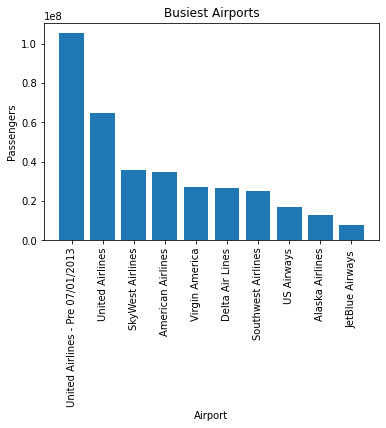

In [10]:
busiest_airports = Air_Traffic.groupby('Operating Airline').sum()['Passenger Count'].sort_values(ascending=False)[:10]

plt.bar(busiest_airports.index, busiest_airports.values)
plt.xticks(rotation=90)
plt.xlabel('Airport')
plt.ylabel('Passengers')
plt.title('Busiest Airports')
plt.show()

/tmp/ipykernel_46697/1640547129.py:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



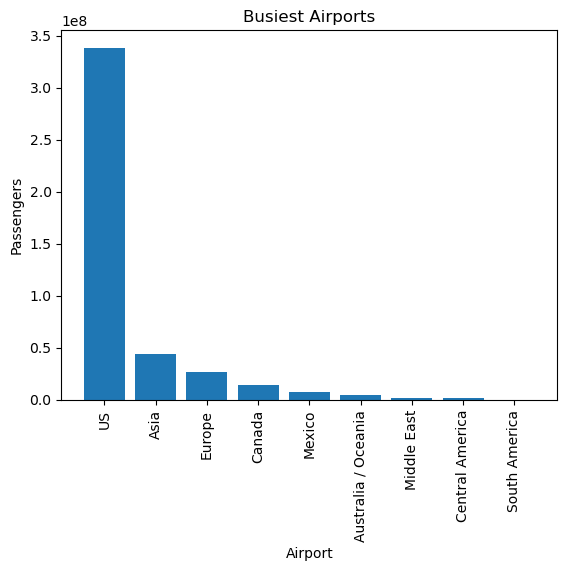

In [8]:
busiest_airports = Air_Traffic.groupby('GEO Region').sum()['Passenger Count'].sort_values(ascending=False)[:10]

plt.bar(busiest_airports.index, busiest_airports.values)
plt.xticks(rotation=90)
plt.xlabel('Airport')
plt.ylabel('Passengers')
plt.title('Busiest Airports')
plt.show()

# Histogram

In [9]:
Air_Traffic.head()

,index,Activity Period,Operating Airline,Operating Airline IATA Code,Published Airline,Published Airline IATA Code,GEO Summary,GEO Region,Activity Type Code,Price Category Code,Terminal,Boarding Area,Passenger Count,Adjusted Activity Type Code,Adjusted Passenger Count,Year,Month
0,0,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Deplaned,Low Fare,Terminal 1,B,27271,Deplaned,27271,2005,July
1,1,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Enplaned,Low Fare,Terminal 1,B,29131,Enplaned,29131,2005,July
2,2,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Thru / Transit,Low Fare,Terminal 1,B,5415,Thru / Transit * 2,10830,2005,July
3,3,200507,Air Canada,AC,Air Canada,AC,International,Canada,Deplaned,Other,Terminal 1,B,35156,Deplaned,35156,2005,July
4,4,200507,Air Canada,AC,Air Canada,AC,International,Canada,Enplaned,Other,Terminal 1,B,34090,Enplaned,34090,2005,July


In [42]:
flights_per_year = Air_Traffic.groupby(['Year','GEO Region']).count()['index']
region_flights = {
    'year':[],
    'region':[],
    'flights':[],
}
for key in flights_per_year.keys():
    region_flights['year'].append(key[0])
    region_flights['region'].append(key[1])
    region_flights['flights'].append(flights_per_year[key])

region_flights_df = pd.DataFrame(region_flights)
print(region_flights_df.head())
fig = pe.line(region_flights_df,x='year',y='flights',color='region',markers=True,symbol='region')
fig.update_traces(marker={'size': 10})

   year               region  flights
0  2005                 Asia      150
1  2005  Australia / Oceania       30
2  2005               Canada       73
3  2005      Central America       12
4  2005               Europe       92


In [117]:
passenger_per_year = Air_Traffic.groupby(['Year','GEO Region']).sum()['Passenger Count']

passenger_flights = {
    'year':[],
    'region':[],
    'passengers':[],
}
for key in passenger_per_year.keys():
    passenger_flights['year'].append(key[0])
    passenger_flights['region'].append(key[1])
    passenger_flights['passengers'].append(passenger_per_year[key])


passenger_flights_df = pd.DataFrame(passenger_flights)
# print(passenger_flights_df.groupby(['year','region'])['passengers'].apply(lambda x:x.diff()))

passenger_flights_df['passenger_deltas'] = np.nan
for region in passenger_flights_df['region'].unique():
    print(region)
    region_data = passenger_flights_df[passenger_flights_df['region'] == region]
    region_deltas = region_data['passengers'].diff()
    for i in region_deltas.index:
        passenger_flights_df['passenger_deltas'][i] = region_deltas[i]

    print(passenger_flights_df.head(20))


# for region in passenger_flights_df['region']:
#     region_data = passenger_flights_df[passenger_flights_df['region'] == region]
#     passenger_deltas = []
#     for year in region_data['year']:
#         if len(passenger_deltas) < 1:
#             passenger_deltas.append(0)
#         else:
#             prev_year_data = region_data[region_data['year'] == year-1]
#             year_data = region_data[region_data['year'] == year]
#             passenger_deltas.append(year_data['passengers'] - prev_year_data['passengers'])
#     passenger_flights_df['passenger_deltas'] = passenger_deltas

passenger_flights_df.head(20)
fig = pe.line(passenger_flights_df,x='year',y='passengers',color='region',markers=True,symbol='region')
fig.update_traces(marker={'size': 10})
fig.show()

fig = pe.line(passenger_flights_df,x='year',y='passenger_deltas',color='region',markers=True,symbol='region')
fig.update_traces(marker={'size': 10})
fig.show()



/tmp/ipykernel_46697/889434994.py:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.

/tmp/ipykernel_46697/889434994.py:23: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_46697/889434994.py:23: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_46697/889434994.py:23: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas

Asia
    year               region  passengers  passenger_deltas
0   2005                 Asia     1955732               NaN
1   2005  Australia / Oceania      164991               NaN
2   2005               Canada      589467               NaN
3   2005      Central America       61994               NaN
4   2005               Europe     1147195               NaN
5   2005               Mexico      305087               NaN
6   2005                   US    12997567               NaN
7   2006                 Asia     3978377         2022645.0
8   2006  Australia / Oceania      453420               NaN
9   2006               Canada     1194203               NaN
10  2006      Central America      111255               NaN
11  2006               Europe     2163664               NaN
12  2006               Mexico      686118               NaN
13  2006                   US    24745933               NaN
14  2007                 Asia     4207750          229373.0
15  2007  Australia / Oceania      

/tmp/ipykernel_31946/1162919785.py:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



<AxesSubplot:>

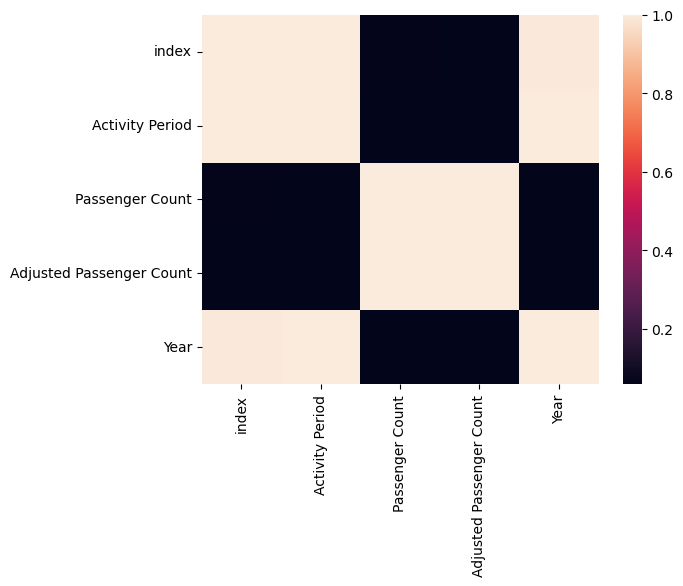

In [ ]:
sns.heatmap(Air_Traffic.corr())

In [ ]:
<<<<<<< LOCAL CELL DELETED >>>>>>>
#!streamlit run case_2.py


  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://195.169.173.116:8501

2023-03-06 13:29:43.607 Uncaught app exception
Traceback (most recent call last):
  File "/home/ar/.local/lib/python3.10/site-packages/streamlit/runtime/scriptrunner/script_runner.py", line 565, in _run_script
    exec(code, module.__dict__)
  File "/home/ar/Documents/minor/DS-groep-6/Case-2/case_2.py", line 41, in <module>
    Air_Traffic = pd.read_csv("data/Air_Traffic_Passenger_Statistics.csv")
NameError: name 'pd' is not defined
2023-03-06 13:29:59.473 Uncaught app exception
Traceback (most recent call last):
  File "/home/ar/.local/lib/python3.10/site-packages/streamlit/runtime/scriptrunner/script_runner.py", line 565, in _run_script
    exec(code, module.__dict__)
  File "/home/ar/Documents/minor/DS-groep-6/Case-2/case_2.py", line 41, in <module>
    Air_Traffic = pd.read_csv("data/Air_Traffic_Passenger_Statistics.csv")
NameError: name 'pd' is no

In [ ]:
acf_df = pd.read_csv("Airplane_Crashes_and_Fatalities_Since_1908.csv")
acf_df.head()

,index,Date,Time,Location,Operator,Flight #,Route,Type,Registration,cn/In,Aboard,Fatalities,Ground,Summary
0,0,09/17/1908,17:18,"Fort Myer, Virginia",Military - U.S. Army,NaN,Demonstration,Wright Flyer III,NaN,1,2.0,1.0,0.0,"During a demonstration flight, a U.S. Army fly..."
1,1,07/12/1912,06:30,"AtlantiCity, New Jersey",Military - U.S. Navy,NaN,Test flight,Dirigible,NaN,NaN,5.0,5.0,0.0,First U.S. dirigible Akron exploded just offsh...
2,2,08/06/1913,NaN,"Victoria, British Columbia, Canada",Private,-,NaN,Curtiss seaplane,NaN,NaN,1.0,1.0,0.0,The first fatal airplane accident in Canada oc...
3,3,09/09/1913,18:30,Over the North Sea,Military - German Navy,NaN,NaN,Zeppelin L-1 (airship),NaN,NaN,20.0,14.0,0.0,The airship flew into a thunderstorm and encou...
4,4,10/17/1913,10:30,"Near Johannisthal, Germany",Military - German Navy,NaN,NaN,Zeppelin L-2 (airship),NaN,NaN,30.0,30.0,0.0,Hydrogen gas which was being vented was sucked...


In [ ]:


def extract_decade(date):
    return round(int(date.split('/')[2])/10)*10

hist_df = acf_df
hist_df['year'] = hist_df['Date'].apply(extract_decade)

pe.histogram(acf_df,x='year')

In [ ]:
import json

acf_df.head()

words = {}

ignore_words = """
the
a
and
to
of
in
crashed
into
was
aircraft
plane
after
while
not
for 
off
en
on
at
by 
from
"""

for summary in acf_df['Summary'].dropna():
    try:
        sum_words = summary.split()
    
        for word in sum_words:
            word = word.lower()
            if word in ignore_words:
                continue
            if word in words:
                words[word] += 1
            else:
                words[word] = 0
    except:
        print(summary)

sorted_words = sorted(words,key=words.get,reverse=True)
sorted_counts = sorted(words.values(),reverse=True)



words = pd.DataFrame({'words':sorted_words,'counts':sorted_counts})
words.head(40)

,words,counts
0,pilot,935
1,flight,864
2,with,817
3,engine,784
4,during,782
5,failure,750
6,crew,693
7,approach,613
8,which,571
9,landing,567
